In [1]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2

In [4]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255)

In [5]:
import matplotlib.pyplot as plt

In [6]:
train_generator = data_generator.flow_from_directory(
    "C:\\Users\\subak\\jupyter\\20210503_project\\data_waffle",
    target_size=(100, 100),
    batch_size=1,
    class_mode='categorical')

Found 0 images belonging to 0 classes.


In [7]:
import cv2
cv2.__version__

'3.4.2'

In [12]:
mypath="C:\\Users\\subak\\jupyter\\20210503_project\\data_waffle"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
images_waffle = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images_waffle[n] = cv2.imread(join(mypath, onlyfiles[n]), cv2.IMREAD_COLOR)

In [13]:
import glob

In [14]:
print((images_waffle[0]).flatten().shape)

(786432,)


In [15]:
for i in range(len(images_waffle)):
    b, g, r = cv2.split(images_waffle[i])
    images_waffle[i] = cv2.merge([r, g, b])

(306, 512, 3)


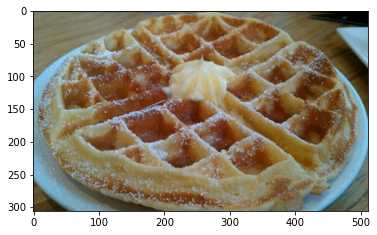

In [25]:
plt.imshow(images_waffle[1])
print(images_waffle[1].shape)
plt.show()

In [26]:
waffle_train = images_waffle[:80]
waffle_test = images_waffle[80:]

In [27]:
mypath="C:\\Users\\subak\\jupyter\\20210503_project\\data_macarons"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
images_macarons = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images_macarons[n] = cv2.imread(join(mypath, onlyfiles[n]), cv2.IMREAD_COLOR)

(512, 512, 3)


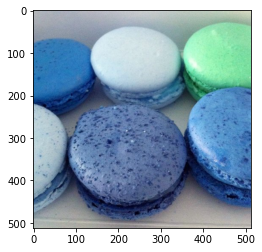

In [28]:
plt.imshow(images_macarons[1])
print(images_macarons[1].shape)
plt.show()

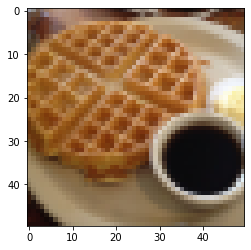

In [118]:
waffle_reshape = images_waffle
for i in range(len(images_waffle)):
    waffle_reshape[i] = cv2.resize(images_waffle[i], dsize=(50, 50), interpolation=cv2.INTER_AREA)

plt.imshow(waffle_reshape[50])

In [119]:
print(waffle_reshape[0][0][0][0])

205


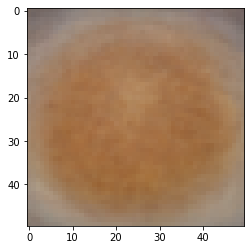

In [120]:
r, g, b = cv2.split(waffle_reshape[0])
avarage_r = r/102
avarage_g = b/102
avarage_b = g/102
for i in range(1, len(waffle_reshape)):
    r, g, b = cv2.split(waffle_reshape[i])
    avarage_r += r/102
    avarage_g += g/102
    avarage_b += b/102
avarage_waffle = cv2.merge([avarage_r.astype(int), avarage_g.astype(int), avarage_b.astype(int)])

plt.imshow(avarage_waffle)

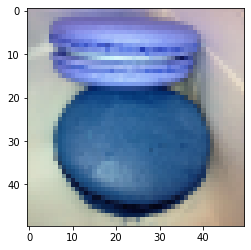

In [124]:
macarons_reshape = images_macarons
for i in range(len(images_macarons)):
    macarons_reshape[i] = cv2.resize(images_macarons[i], dsize=(50, 50), interpolation=cv2.INTER_AREA)

plt.imshow(macarons_reshape[40])

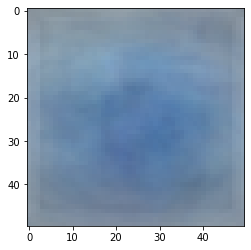

In [122]:
r, g, b = cv2.split(macarons_reshape[0])
avarage_r = r/102
avarage_g = b/102
avarage_b = g/102
for i in range(1, len(macarons_reshape)):
    r, g, b = cv2.split(macarons_reshape[i])
    avarage_r += r/102
    avarage_g += g/102
    avarage_b += b/102
avarage_macaron = cv2.merge([avarage_r.astype(int), avarage_g.astype(int), avarage_b.astype(int)])

plt.imshow(avarage_macaron)

In [53]:
macarons_reshape[0].shape

(50, 50, 3)

In [64]:
waffle_train = waffle_reshape[:80]
waffle_test = waffle_reshape[80:]

In [65]:
macarons_train = macarons_reshape[:80]
macarons_test = macarons_reshape[80:]

In [66]:
train_data = np.concatenate((waffle_train, macarons_train))
test_data = np.concatenate((waffle_test, macarons_test))

In [67]:
import numpy as np
train_label = [True for _ in range(80)] + [False for _ in range(80)]
test_label = [True for _ in range(22)] + [False for _ in range(22)]
train_label_np = np.asarray(train_label)
test_label_np = np.asarray(test_label)
train_data_np = np.asarray(train_data)
test_data_np = np.asarray(test_data)

In [68]:
# import pandas as pd
# train_data_np_pd = pd.DataFrame(train_data_np)
# train_data_np_pd

In [69]:
train_data_np_f = np.asarray([dataset.flatten() for dataset in train_data_np])
test_data_np_f = np.asarray([dataset.flatten() for dataset in test_data_np])
print(type(train_data_np))
print(train_data_np[0].shape)
print(train_data_np_f.shape)

<class 'numpy.ndarray'>
(50, 50, 3)
(160, 7500)


In [70]:
print(train_data_np)

[array([[[205, 160, 182],
         [209, 162, 182],
         [207, 160, 180],
         ...,
         [238, 251, 253],
         [225, 243, 252],
         [209, 227, 248]],

        [[209, 165, 184],
         [210, 165, 182],
         [210, 163, 181],
         ...,
         [238, 254, 255],
         [226, 245, 253],
         [209, 228, 248]],

        [[211, 171, 190],
         [209, 162, 179],
         [209, 162, 179],
         ...,
         [238, 253, 254],
         [226, 245, 253],
         [210, 230, 251]],

        ...,

        [[185,  45,  50],
         [182,  40,  45],
         [179,  51,  60],
         ...,
         [159,  56,  57],
         [160,  90,  97],
         [165, 156, 173]],

        [[192,  82,  92],
         [192,  70,  78],
         [190,  73,  83],
         ...,
         [161,  63,  69],
         [169,  55,  55],
         [174,  54,  56]],

        [[207, 210, 224],
         [203, 123, 133],
         [199,  91, 100],
         ...,
         [173, 146, 163],
        

In [71]:
train_data_np_f_pd = pd.DataFrame(train_data_np_f)
train_data_np_f_pd

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,205,160,182,209,162,182,207,160,180,208,...,211,173,146,163,179,56,56,190,52,49
1,120,125,103,120,123,105,123,126,108,125,...,78,82,87,73,104,109,90,101,106,88
2,125,116,100,119,113,99,108,102,89,92,...,73,146,114,91,205,194,187,202,195,193
3,67,48,26,68,49,24,66,49,24,61,...,146,207,199,144,207,202,152,206,204,168
4,28,21,9,29,31,20,15,34,33,16,...,128,138,142,129,134,141,130,123,132,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,172,176,182,170,177,184,165,174,182,162,...,142,139,142,146,147,146,150,149,149,151
156,234,230,233,238,233,234,235,230,229,227,...,239,137,138,136,78,72,72,109,102,99
157,173,200,216,181,204,220,185,207,222,187,...,223,187,205,226,184,205,226,186,204,225
158,221,221,234,218,219,233,229,232,246,231,...,229,214,239,246,183,196,200,131,138,139


In [72]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(train_data_np_f, train_label_np)

SGDClassifier(random_state=42)

In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_data_np_f, train_label_np, cv=3, scoring="accuracy")

array([0.96296296, 0.98113208, 0.9245283 ])

In [81]:
# for i in range(44):
#     print(i, sgd_clf.predict([test_data_np_f[i]])[0])
#     print(type(sgd_clf.predict([test_data_np_f[i]])))

In [75]:
acc_counter = 0
for i in range(len(test_label_np)):
    if sgd_clf.predict([test_data_np_f[i]])[0] == test_label_np[i]:
        acc_counter += 1
acc = acc_counter / len(test_label_np)
print("accuracy :", acc)

accuracy : 1.0


In [76]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, train_data_np_f, train_label_np, cv=3)

In [77]:
from sklearn.metrics import precision_score, recall_score

precision_score(train_label_np, y_train_pred)

0.9397590361445783

In [78]:
y_scores = cross_val_predict(sgd_clf, train_data_np_f, train_label_np, cv=3,
                            method="decision_function")

In [79]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(train_label_np, y_scores)

In [85]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, train_data_np_f, train_label_np, cv=3)

In [86]:
recall_score(train_label_np, y_train_pred)

0.975

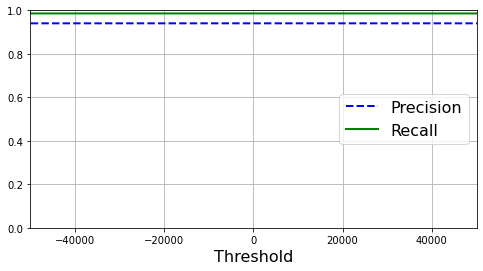

In [80]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.91)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision],"r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()